# Aula 2

## Dataset 1 - ccee-brazil-energy-consumption

In [ ]:
from pathlib import Path

import kagglehub

# Download latest version
dataset_str = kagglehub.dataset_download(
    handle="danielluzzi/ccee-brazil-energy-consumption"
)

data_base_dir = Path(dataset_str)

In [ ]:
from pandas import read_csv

wheat_csv = data_base_dir / "CCEE_BR_Data.csv"

# Para definir um esquema para os tipos dos dados ao ler o CSV, use o parâmetro 'dtype' do read_csv:
dtypes = {
    "Data": str,
    "Classe": str,
    "Ramo": str,
    "Submercado": str,
    "UF": str,
    "Consumo": float,
    "Covid": bool,
}

df = read_csv(wheat_csv, dtype=dtypes)

In [ ]:
df.head()

In [ ]:
df.Data = df.Data.astype("datetime64[ns]")

In [ ]:
df.describe()

In [ ]:
df.dtypes

#### Frequência

In [ ]:
df.UF.value_counts()

#### Histograma

In [ ]:
import matplotlib.pyplot as plt

ax = df.hist()
plt.show()

#### Gráfico de Pizza

In [ ]:
uf_counts = df.UF.value_counts()

uf_counts.plot.pie()

plt.ylabel("")

plt.show()

### Medidas de Localidade

#### Moda

In [ ]:
df.Consumo.mode()

#### Média

In [ ]:
df.Consumo.mean()

#### Mediana

In [ ]:
df.Consumo.median()

#### Percentil

In [ ]:
df.Consumo.quantile(0.25), df.Consumo.quantile(0.75), df.Consumo.quantile(0.5)

In [ ]:
df.boxplot()

### Medidas de Dispersão

#### Intervalo

In [ ]:
intervalo = df.Consumo.max() - df.Consumo.min()
intervalo

#### variância

In [ ]:
df.Consumo.var()

#### Desvio padrão

In [ ]:
df.Consumo.std()

#### Covariância

In [ ]:
df.cov(numeric_only=True)

#### Correlação

In [ ]:
import seaborn as sns

sns.pairplot(df)

plt.show()

## Dataset 2 - individual household electric power consumption

Dataset Information

Additional Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes: 

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Carregando os dados

In [1]:
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo
from pathlib import Path
import pandas as pd


data_dir = Path("data").resolve()

data_dir.mkdir(exist_ok=True)

dataset = data_dir / "individual_household_electric_power_consumption.csv"


In [ ]:
from numpy import float32


dtypes = {
    "Data": str,
    "Time": str,
    "Global_active_power": float32,
    "Global_reactive_power": float32,
    "Voltage": float32,
    "Global_intensity": float32,
    "Sub_metering_1": float32,
    "Sub_metering_2": float32,
    "Sub_metering_3": float32,
}

In [ ]:
# fetch dataset
if not dataset.exists():
    fetch_data = fetch_ucirepo(id=235)
    df: DataFrame = fetch_data.data.features

    df.to_csv(sep=";", index=False, path_or_buf=dataset)
else:
    df = pd.read_csv(
        filepath_or_buffer=dataset,
        sep=";",
        index_col=False,
        dtype=dtypes,
        na_values=["?"],
    )


In [ ]:
# Concatena colunas Date e Time em Datetime
df["Datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S"
)

df.set_index("Datetime", inplace=True)
df.drop(columns=["Date", "Time"], inplace=True, errors="ignore")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


# Análise Exploratória dos Dados para Previsão de Global_active_power

In [ ]:
Y = "Global_active_power"

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração do estilo dos gráficos
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

In [22]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408398e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [24]:
total_elementos = len(df)
linhas_nulas = df.isnull().any(axis=1).sum()

f"Elementos nulos: {linhas_nulas / total_elementos:%}"

'Elementos nulos: 1.251844%'

In [19]:
Q1 = df[Y].quantile(0.25)
Q3 = df[Y].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[Y] < lower_bound) | (df[Y] > upper_bound)]

msg = f"""\n=== ANÁLISE DE OUTLIERS ({Y}) ==="

Número de outliers: {len(outliers)} ({len(outliers) / len(df) * 100:.2f}%)
Valor mínimo: {df[Y].min():.4f}
Q1: {Q1:.4f}
Mediana: {df[Y].median():.4f}
Q3: {Q3:.4f}
Valor máximo: {df[Y].max():.4f}
Limite inferior para outliers: {lower_bound:.4f}
Limite superior para outliers: {upper_bound:.4f}
"""
print(msg)


=== ANÁLISE DE OUTLIERS (Global_active_power) ==="

Número de outliers: 94907 (4.57%)
Valor mínimo: 0.0760
Q1: 0.3080
Mediana: 0.6020
Q3: 1.5280
Valor máximo: 11.1220
Limite inferior para outliers: -1.5220
Limite superior para outliers: 3.3580



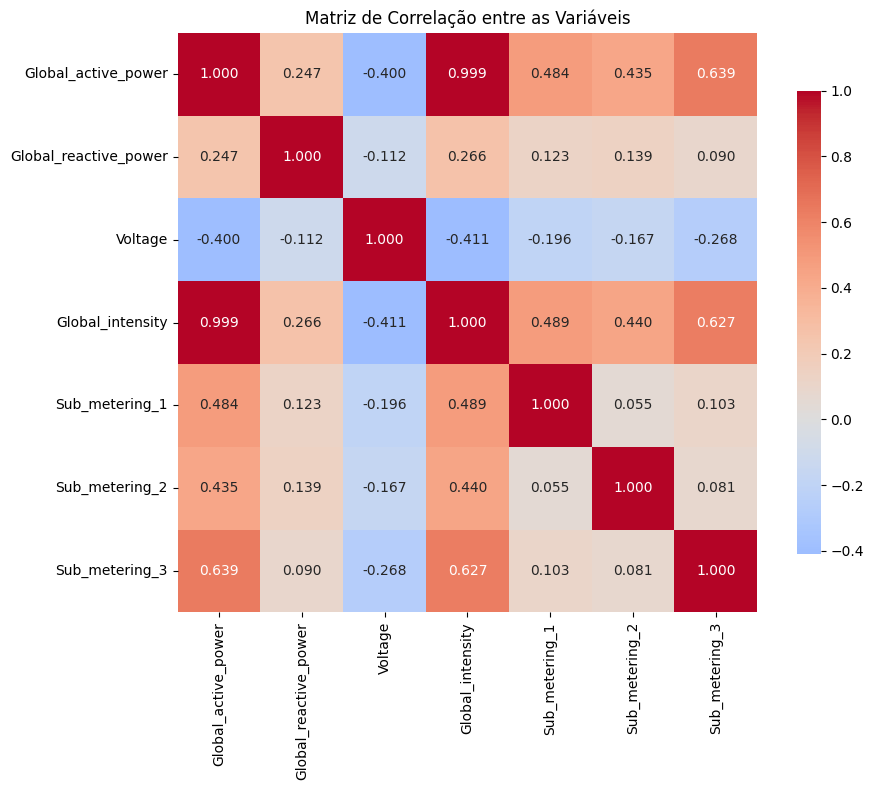

In [ ]:
# 4. ANÁLISE DE CORRELAÇÕES
correlation_matrix = df.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Matriz de Correlação entre as Variáveis")
plt.tight_layout()
plt.show()

# Correlações com a variável alvo
target_corr = correlation_matrix["Global_active_power"].sort_values(ascending=False)

In [33]:
# Selecionar as variáveis mais correlacionadas
top_features = target_corr.drop(Y).head(3).index.tolist()
print(f"Variáveis com maior correlação com {Y}:")
for i, feature in enumerate(top_features):
    corr_value = target_corr[feature]
    print(f"{i + 1}. {feature}: {corr_value:.3f}")

Variáveis com maior correlação com Global_active_power:
1. Global_intensity: 0.999
2. Sub_metering_3: 0.639
3. Sub_metering_1: 0.484


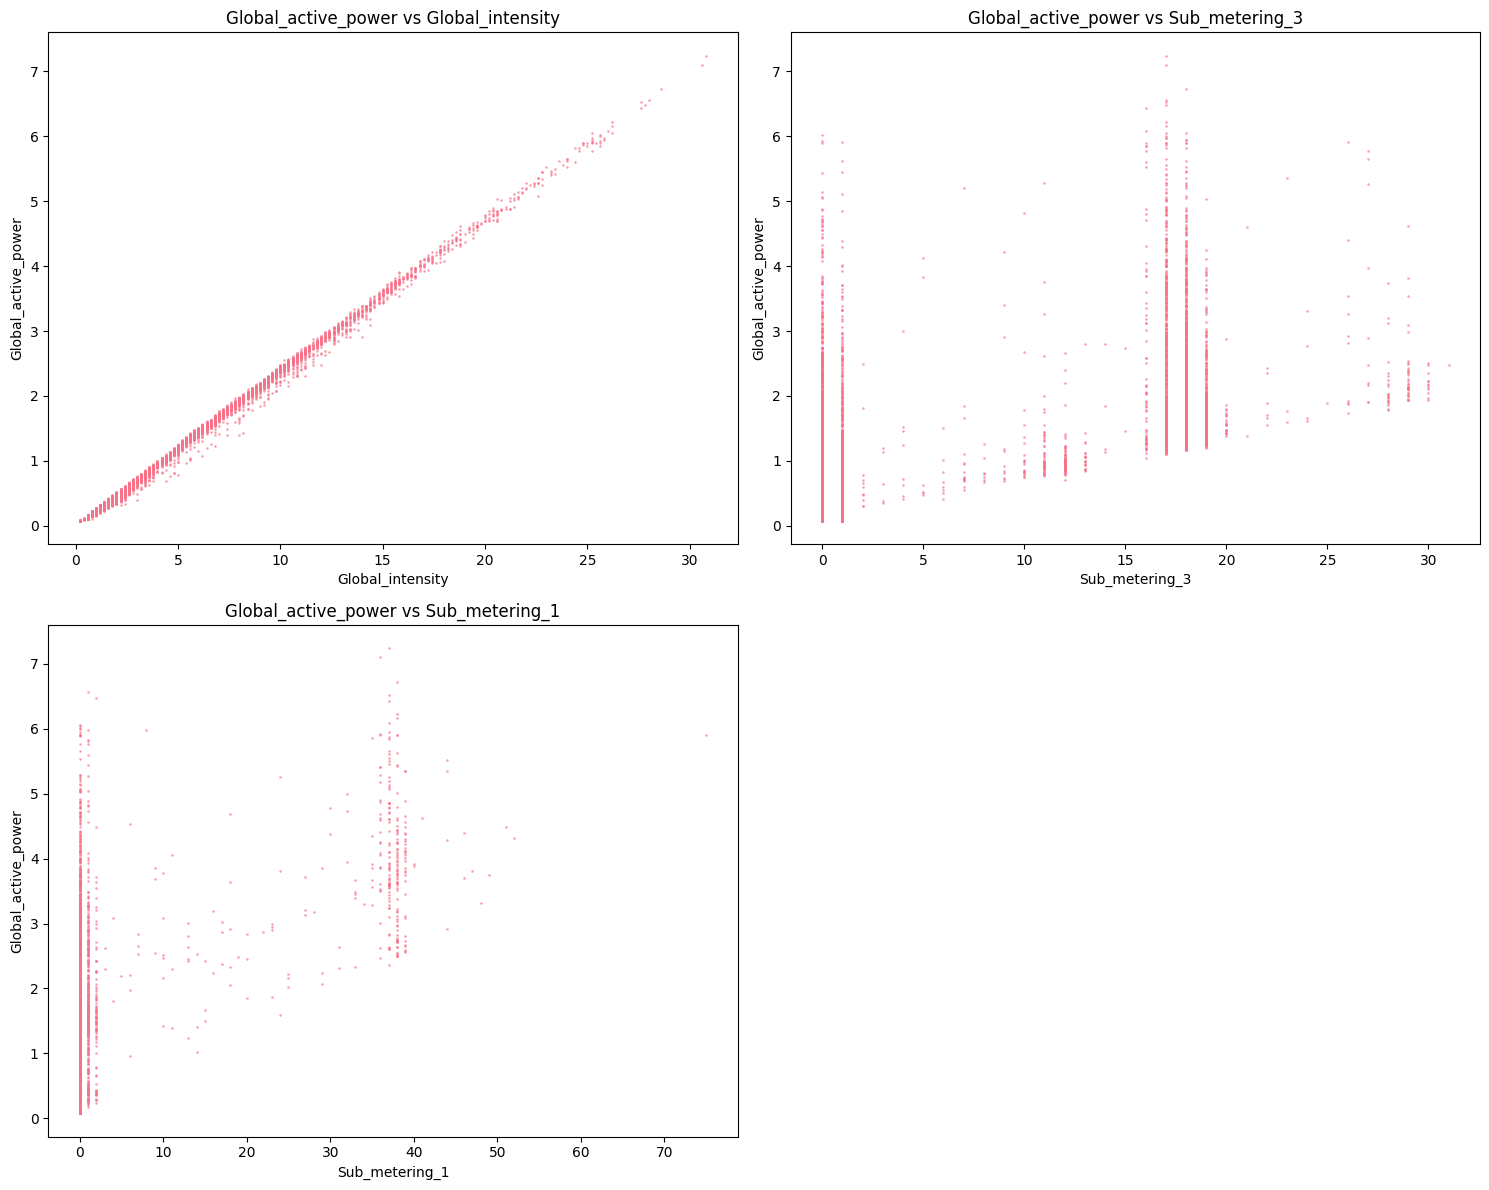

In [ ]:
# 5. SCATTER PLOTS PARA VISUALIZAR RELACIONAMENTOS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Criar sample para visualização (dados muito grandes)
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

for i, feature in enumerate(top_features):
    axes[i].scatter(df_sample[feature], df_sample[Y], alpha=0.5, s=1)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(Y)
    axes[i].set_title(f"{Y} vs {feature}")

# Remover o último subplot se não for usado
if len(top_features) < 4:
    fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

In [52]:
cleared_df = data_dir / "individual_household_electric_power_consumption_cleared.csv"

df.to_csv(
    path_or_buf=cleared_df,
    sep=";",
)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB
